<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_2_2_1_dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import torch
import torchvision
train_data = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True)

In [ ]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
A = train_data[0]
print(type(A), len(A), A[0],
      A[1], train_data.classes[A[1]],
      sep='\n')

<class 'tuple'>
2
<PIL.Image.Image image mode=L size=28x28 at 0x7F5EFCE53F10>
9
Ankle boot


In [ ]:
print(len(train_data))
train_data.classes

60000


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
convert = torchvision.transforms.PILToTensor()
img     = convert(A[0])
print(type(img), img.size(), sep='\n')

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


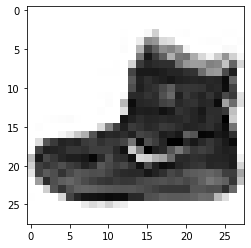

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(torch.squeeze(img), cmap='Greys');

# Dataloader

In [ ]:
from torch.utils.data import DataLoader
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=False,
    transform=torchvision.transforms.PILToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1000)

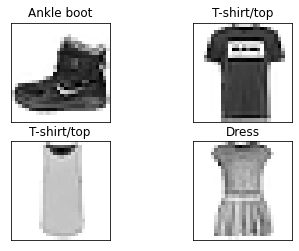

In [ ]:
iterator     = iter(train_dataloader)
imgs, labels = next(iterator)
class_names  = train_data_transformed.classes
fig          = plt.figure()
for i in range(4):
  ax = fig.add_subplot(2, 2, i+1)
  plt.imshow(torch.squeeze(imgs[i]), cmap='Greys')
  ax.set_title(class_names[labels[i]])
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)

In [ ]:
for imgs, labels in train_dataloader:
  pass
enumerator = enumerate(train_dataloader)
for batch_idx, (imgs, labels) in enumerator:
  pass

# Flatten




In [ ]:
A = torch.arange(2*5).reshape(2,5)
print(A, A.size())
A = A.flatten()
print(A, A.size())

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) torch.Size([2, 5])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) torch.Size([10])


#One-Hot Encoding

In [ ]:
imgs, labels = next(iterator)
print(labels)
torch.nn.functional.one_hot(labels,num_classes=10)

tensor([7, 5, 4, 9])


tensor([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])